In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
salary = pd.read_excel('Engineering_graduate_salary.xlsx')
salary.head()

,ID,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,87.80,2009,84.00,1,73.82,1,2013,650,665,...,-1,-1,-1,-1,-0.1590,0.3789,12396.0000,0.14590,0.2889,445000
1,988334,57.00,2010,64.50,2,65.00,0,2014,440,435,...,-1,-1,-1,-1,11336.0000,0.0459,12396.0000,0.52620,-0.2859,110000
2,301647,77.33,2007,85.17,2,61.94,0,2011,485,475,...,-1,-1,260,-1,0.5100,-0.1232,15428.0000,-0.29020,-0.2875,255000
3,582313,84.30,2009,86.00,1,80.40,1,2013,675,620,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,82.00,2008,75.00,2,64.30,1,2012,575,495,...,-1,-1,-1,-1,-14992.0000,-0.7473,-10697.0000,0.06223,0.1864,200000


In [35]:
# split train test
from sklearn.model_selection import train_test_split

feature = salary.drop(columns='Salary')
target = salary[['Salary']]

feature_salary_train, feature_salary_test, target_salary_train, target_salary_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_salary_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

C:\Users\desir\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\desir\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,vif_score
1,ID,1.454303
2,10percentage,1.973383
3,12graduation,2.184298
4,12percentage,1.850978
5,CollegeTier,1.089957
6,collegeGPA,1.192344
7,CollegeCityTier,1.042290
8,GraduationYear,1.009503
9,English,1.416552
10,Logical,1.567983


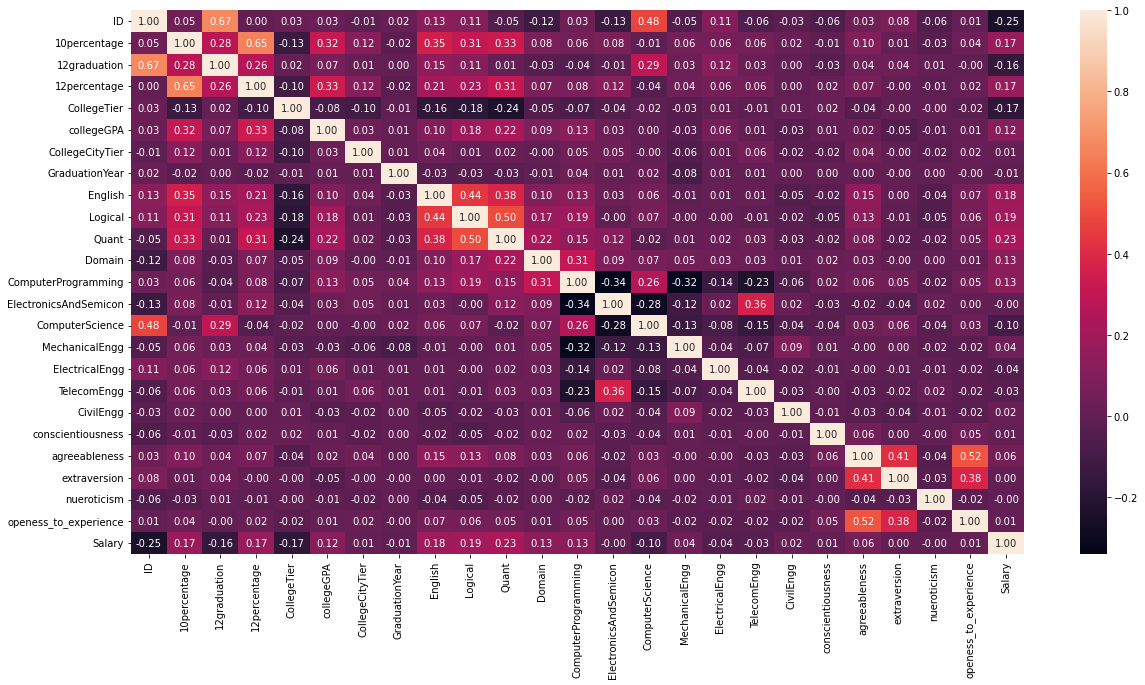

In [39]:
# heatmap correlation
salary_train = pd.concat([feature_salary_train, target_salary_train], axis=1)
corr = salary_train.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

### Recheck VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_salary_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

C:\Users\desir\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\desir\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,vif_score
1,ID,1.454303
2,10percentage,1.973383
3,12graduation,2.184298
4,12percentage,1.850978
5,CollegeTier,1.089957
6,collegeGPA,1.192344
7,CollegeCityTier,1.042290
8,GraduationYear,1.009503
9,English,1.416552
10,Logical,1.567983


## Model Training

In [43]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_salary_train = feature_salary_train.to_numpy()
y_salary_train = target_salary_train.to_numpy()

multi_reg.fit(X_salary_train, y_salary_train)

LinearRegression()

In [44]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_salary_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,1.491092e+07
1,ID,-1.372336e-01
2,10percentage,1.056364e+03
3,12graduation,-7.447895e+03
4,12percentage,1.378786e+03
5,CollegeTier,-8.620839e+04
6,collegeGPA,9.576904e+02
7,CollegeCityTier,-1.178767e+04
8,GraduationYear,3.390472e+01
9,English,2.221734e+02


Interpretation :
1.491092e+07 -1.372336e-01*ID + 1.056364e+03 + 1.056364e+03*10percentage + -7.447895e+03*12graduation + 1.378786e+03*12percentage -8.620839e+04*collegetier + 9.576904e+02*collegeGPA -1.178767e+04*collegecititier + 3.390472e+01*graduationyear + 2.221734e+02*english + 1.912357e+02*logical + 1.101350e+02*quant + 1.503292e+04*domain + 6.949029e+01*computerprogramming  -4.409923e+01*ElectronicsAndSemicon + 6.277833e+01*MechanicalEngg -4.272377e+01*-4.272377e+01 -4.837026e+01*TelecomEngg + 1.446280e+02*CivilEngg -2.387424e-11*conscientiousness + 6.768914e-01*agreeableness + 5.973686e-01*extraversion - 6.286882e-11*nueroticism -8.210619e-01*openess_to_experience

## Model Diagnostic

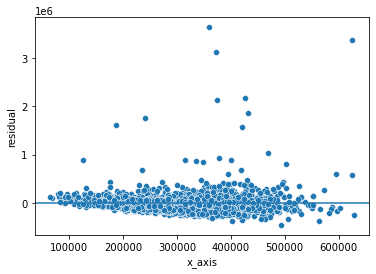

In [45]:
# calculate residuals
y_predict_train = multi_reg.predict(X_salary_train)
residual = y_salary_train - y_predict_train

#preprocess shape
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


C:\Users\desir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


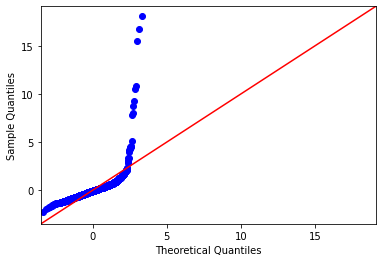

In [46]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

In [47]:
# R^2 score
from sklearn.metrics import r2_score

r2_score(y_salary_train,y_predict_train)

0.17083810102096675

## Model Evaluation

### Training Error

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_salary_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_salary_train))))

R-squared for training data is -3.8535391352042794
RMSE for training data is 201454.44354092673


### Testing Error

In [49]:
# prepare prediction result on test data
X_salary_test = feature_salary_test.to_numpy()
y_predict_test = multi_reg.predict(X_salary_test)

# ground truth target
y_salary_test = target_salary_test.to_numpy()

In [50]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_salary_test))))

RMSE for testing data is 152799.36532444853
